<a href="https://colab.research.google.com/github/Lnguyen19/CS_478/blob/main/Lam_Nguyen_Eric_Thompson_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1
# Load the dependencies and your data set.
import keras
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding, SpatialDropout1D, Conv1D, GlobalMaxPool1D, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import SimpleRNN

import pickle
import numpy as np
from keras.preprocessing.text import Tokenizer

# Reading in data from url
dataset_url = 'https://raw.githubusercontent.com/WithAPorpoise/public_datasets/main/spam_ham_dataset.csv'
data = pd.read_csv(dataset_url, usecols=["class", "message"]) # Ignore NaN columns
print(data.head())

# Split message and class columns into variables
message_data = data.message               # X
class_data = data.drop('message', axis=1) # Y
print("PRINTING CLASS DATA")
print(class_data)
print("PRINTING MESSAGE DATA")
print(message_data)

  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
PRINTING CLASS DATA
     class
0      ham
1      ham
2     spam
3      ham
4      ham
...    ...
5400   ham
5401   ham
5402   ham
5403   ham
5404   ham

[5405 rows x 1 columns]
PRINTING MESSAGE DATA
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5400    HARD BUT TRUE: How much you show &amp;  expres...
5401    Babes I think I got ur brolly I l

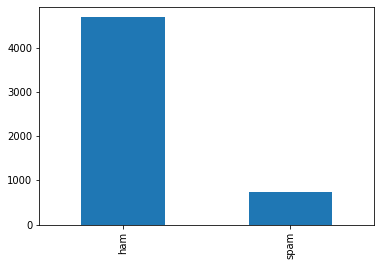

In [ ]:
# 2
# Separate your data set between train and test in a 70/30 split. 
# Additionally, I would like you to print a graph of the number of 
# label_value_counts() of the data set to show the distribution of labels.

x_train, x_test, y_train, y_test = train_test_split(message_data, class_data, test_size=0.3)
class_data['class'].value_counts().plot(kind='bar')

In [ ]:
# 4
#    Set your hyperparameters:

#    epochs,
#    batch size,
#    dimension,
#    unique words,
#    stop words,
#    maximum message length,
#    padding type,
#    truncation type,
#    #dense layer,
#    dropout,
#    n_filters,
#    optimizers,
#    or anything else needed.

output_dir = 'model_output/dense'
epochs = 4
batch_size = 128

n_dim = 100
n_unique_words = 5000
n_words_to_skip = 50
pad_type = trunc_type = 'pre'
n_dense = 100
dropout = 0.5
#CNN
cnn_max_review =400 
cnn_dense = 256
cnn_dropout = 0.2
n_conv = 256
k_conv = 3


#RNN
n_rnn = 256
drop_rnn = 0.2
drop_embed = 0.2
#LSTM
out_put_ = 'model_output/conv'
lstm_max_review = 400
lstm_drop_embed = 0.2
lstm_n_conv = 256 
lstm_k_conv = 0.2
lstm_dropout = 0.2

In [ ]:
# 3
# Apply all ( or subset of) the preprocessing steps that we learned in the class:
# Tokenization
# Convertion to lowercase
# Removing stop words
# Removing puntuation
# Stemming
# n-grams
# Converting tokens into an integer index
#x_train = pad_sequences(x_train,maxlen=max_review_length,padding = pad_type,truncating=trunc_type,value=0)
#x_test = pad_sequences(x_test,maxlen=max_review_length,padding = pad_type,truncating=trunc_type,value=0)

# Tokenizing
max_review_length = 100
token = Tokenizer()
token.fit_on_texts(x_train)
token.fit_on_texts(x_test)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print(x_test)

print(x_train.shape)
print(x_test.shape)



[[   0    0    0 ...   74  225  129]
 [   0    0    0 ...  132   23 1215]
 [   0    0    0 ...   58  104 1430]
 ...
 [   0    0    0 ...  126   22    3]
 [   0    0    0 ...   58 1093   45]
 [   0    0    0 ...  651  140  264]]
(3783, 100)
(1622, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# 5
#     Create, fit and evaluate the following models:

# Follow the instructions laid out from class lecture. Create one of each of the following models:

#    Dense
#    Convolutional
#    Simple RNN
#    LSTM

# Dense
model1 = Sequential() # Each layer flows to the next
#1st hidden layer
model1.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model1.add(Flatten())
#2nd hidden layer
model1.add(Dense(n_dense, activation='relu'))
model1.add(Dropout(dropout))
#3rd hidden layer if needed more
model1.add(Dense(n_dense, activation='relu'))
model1.add(Dropout(dropout))
#Output layer: Single sigmoid neuron to predict binary classification
model1.add(Dense(1, activation='sigmoid'))

# CNN
model2 = Sequential()
model2.add(Embedding(n_unique_words, n_dim, input_length=cnn_max_review))
model2.add(SpatialDropout1D(drop_embed))
model2.add(Conv1D(n_conv,k_conv,activation = 'relu'))
model2.add(GlobalMaxPool1D())
model2.add(Dense(cnn_dense,activation='relu'))
model2.add(Dropout(cnn_dropout))
model2.add(Dense(1,activation = 'sigmoid'))

# RNN
model3 = Sequential()
#1st hidden layer
model3.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model3.add(SpatialDropout1D(drop_embed))
#2nd hidden layer
model3.add(SimpleRNN(n_rnn, dropout=drop_rnn))
#output layer
model3.add(Dense(1, activation='sigmoid'))

# LSTM
model4 = Sequential()
model4.add(Embedding(n_unique_words, n_dim, input_length= lstm_max_review)) 
model4.add(SpatialDropout1D(lstm_drop_embed))
#model4.add(Conv1D(lstm_n_conv, lstm_k_conv, activation='relu'))
#model4.add(GlobalMaxPool1D())
model4.add(Dense(n_dense, activation='relu'))
model4.add(Dropout(lstm_dropout))
model4.add(Dense(1, activation='sigmoid'))
# Compiling
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#
# Graph execution error here, can't figure out why. data is tokenized
#
history1 =  model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history2 =  model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history3 =  model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
history4 =  model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/4


UnimplementedError: ignored

In [ ]:
# Evaluations can be done on the basis of ROC-AUC. You have to draw the ROC-AUC curve for each model.
# Dense
y_hat1 = model1.predict(x_test)
fpr , tpr , thresholds = roc_curve (y_test , y_hat1)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

# CNN
y_hat2 = model2.predict(x_test)
fpr , tpr , thresholds = roc_curve (y_test , y_hat2)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

# RNN
y_hat3 = model3.predict(x_test)
fpr , tpr , thresholds = roc_curve (y_test , y_hat3)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

# LSTM
y_hat4 = model4.predict(x_test)
fpr , tpr , thresholds = roc_curve (y_test , y_hat4)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

In [ ]:
# 6
#    Tune your model

# Select the model which performed the best in the previous step and then tune the hyperparameters
